# Laboratory 4 - Regression
#### Universidad del Valle de Guatemala
#### Data Mining
#### Douglas de León Molina - 18037

## Importación de librerías

In [201]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Exploración de Datos

In [213]:
dataset = pd.read_csv("insurance.csv")
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


age         sex         bmi    children      smoker      region  \
count  348.000000  348.000000  348.000000  348.000000  348.000000  348.000000   
mean    39.591954    0.508621   30.676552    1.091954    0.232759    1.497126   
std     14.417015    0.500646    5.625850    1.192021    0.423198    1.104089   
min     18.000000    0.000000   15.960000    0.000000    0.000000    0.000000   
25%     27.000000    0.000000   26.782500    0.000000    0.000000    1.000000   
50%     40.000000    1.000000   30.300000    1.000000    0.000000    2.000000   
75%     53.000000    1.000000   34.777500    2.000000    0.000000    2.000000   
max     64.000000    1.000000   49.060000    5.000000    1.000000    3.000000   

            charges  
count    348.000000  
mean   14016.426293  
std    12638.887852  
min     1137.011000  
25%     4888.466125  
50%     9719.305250  
75%    19006.316150  
max    51194.559140

Como podemos ver, el dataset está conformado por 348 datos de 7 variables: age, sex, bmi, children, smoker, region y charges con 2 variables tipo float64 y 5 variables tipo int64 (ver tabla de arriba). Cabe mencionar que las variables sex y smoker son de tipo booleano (valores 1 o 0) y que la variable region es de tipo categórica con 4 tipo de valores. El análisis exploratorio de los datos se puede visualizar en la segunda tabla que se muestra arriba.

(array([171., 177.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

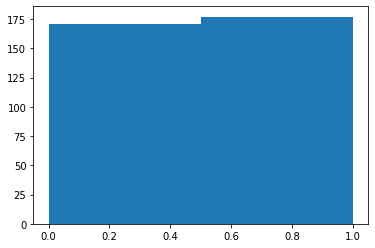

In [203]:
plt.hist(dataset["sex"], bins=2)

(array([267.,  81.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

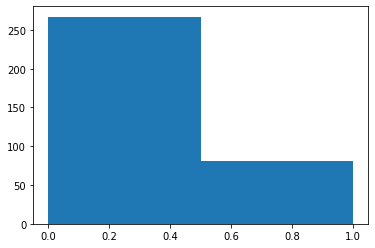

In [204]:
plt.hist(dataset["smoker"], bins=2)

(array([86., 85., 95., 82.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

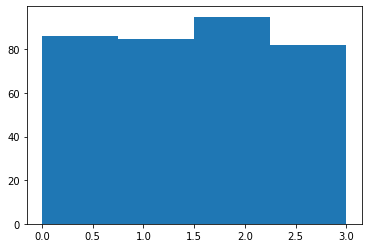

In [205]:
plt.hist(dataset["region"], bins=4)

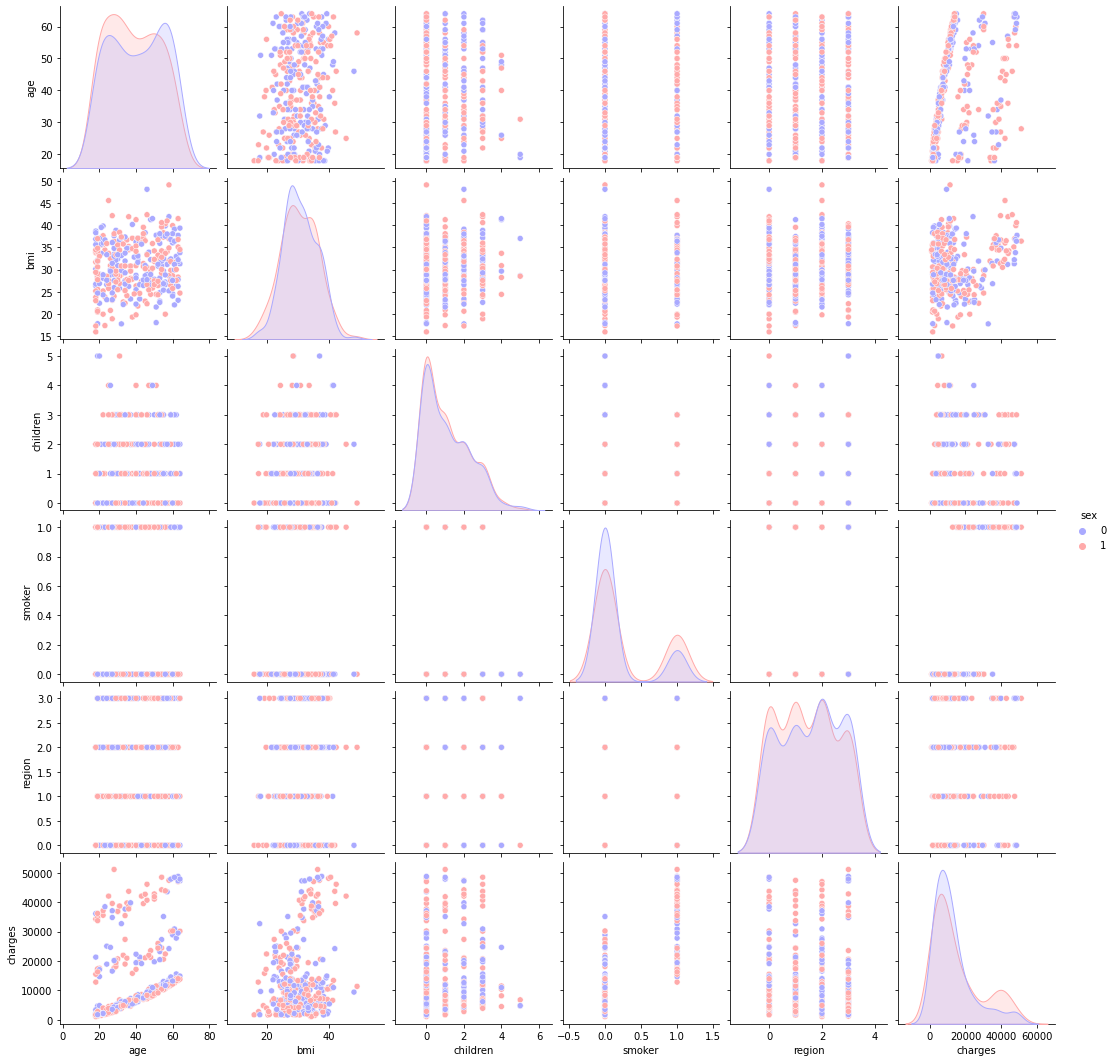

In [206]:
sns.pairplot(dataset, hue='sex', palette='bwr')

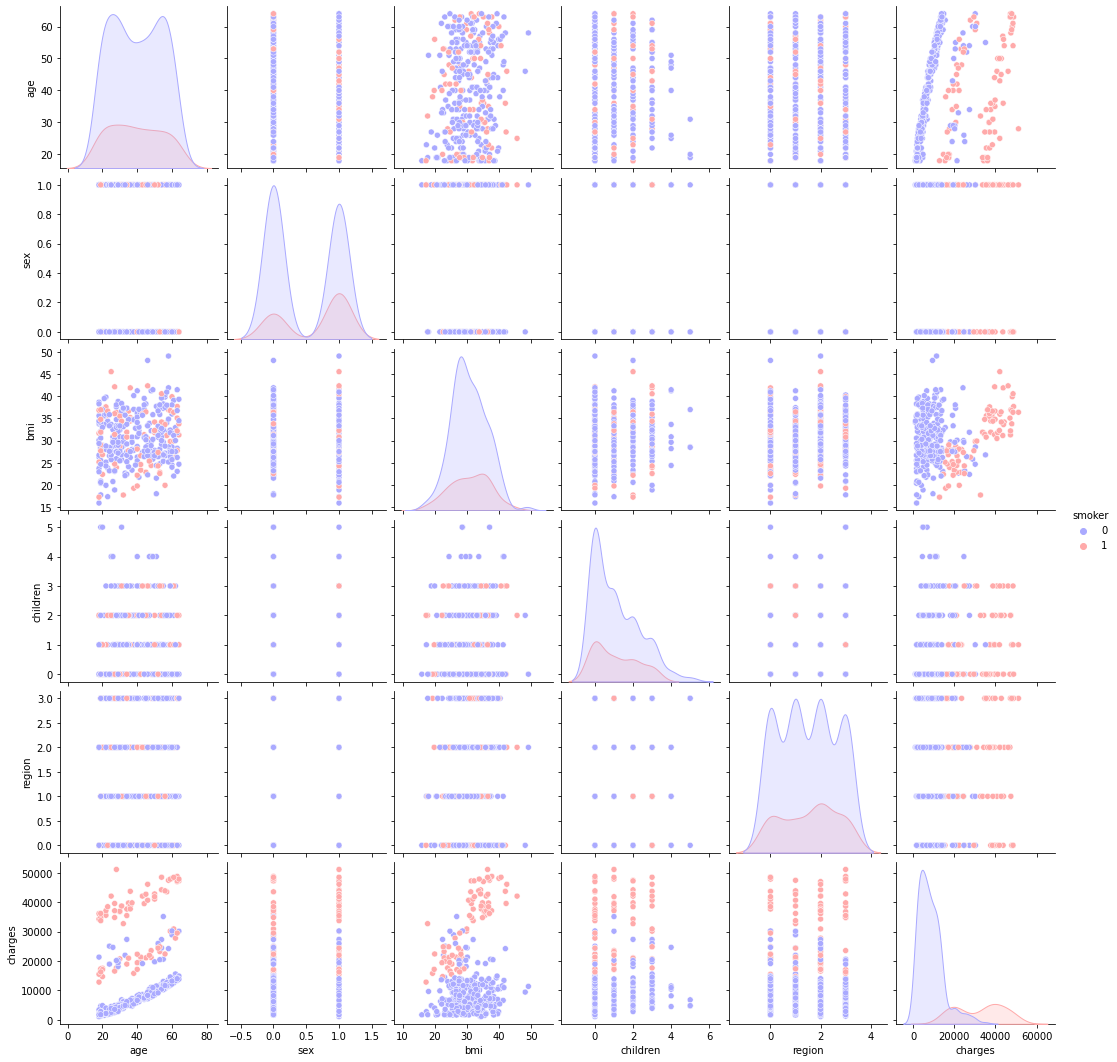

In [207]:
sns.pairplot(dataset, hue='smoker', palette='bwr')

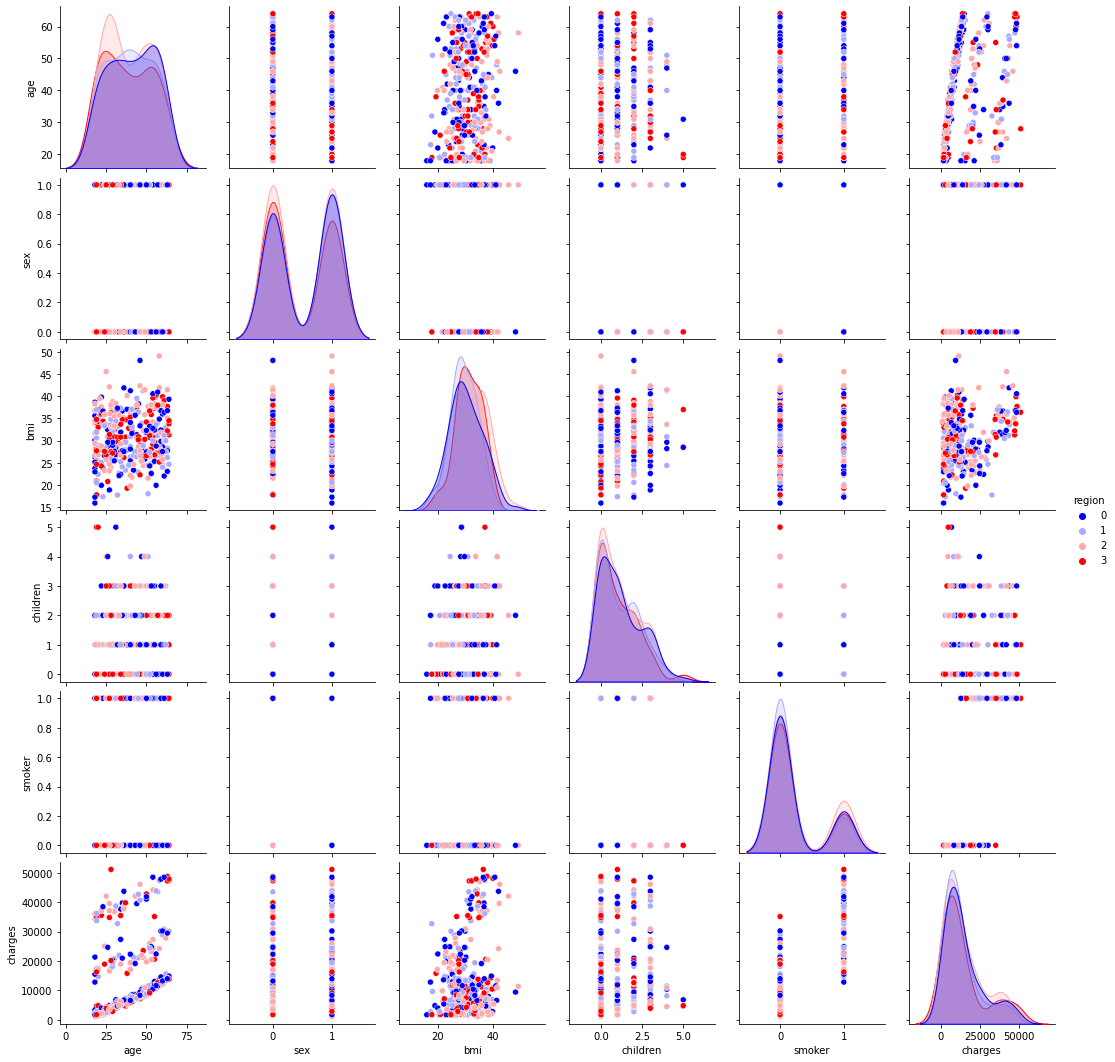

In [208]:
sns.pairplot(dataset, hue='region', palette='bwr')

## Hipótesis u objetivo
El objetivo principal es predecir el valor de la variable charges con base a la data de las demás variables para un cliente nuevo.

## Solución y exploración

### Preparación de las variables categóricas
Para la variable region utilizamos el OneHotEncoder de Sklearn para obtener nuestras variables "dummy". Las variables sex y smoker se mantienen como valores binarios.

In [214]:
# importación de librerías para manejo de variables categóricas
from sklearn.preprocessing import OneHotEncoder

In [215]:
ohe = OneHotEncoder()

region_enc = pd.DataFrame(ohe.fit_transform(dataset[['region']]).toarray())
dataset = dataset.join(region_enc)
dataset

age  sex     bmi  children  smoker  region      charges    0    1    2  \
0     19    0  27.900         0       1       3  16884.92400  0.0  0.0  0.0   
1     18    1  33.770         1       0       2   1725.55230  0.0  0.0  1.0   
2     28    1  33.000         3       0       2   4449.46200  0.0  0.0  1.0   
3     33    1  22.705         0       0       1  21984.47061  0.0  1.0  0.0   
4     32    1  28.880         0       0       1   3866.85520  0.0  1.0  0.0   
..   ...  ...     ...       ...     ...     ...          ...  ...  ...  ...   
343   63    1  36.765         0       0       0  13981.85035  1.0  0.0  0.0   
344   49    0  41.470         4       0       2  10977.20630  0.0  0.0  1.0   
345   34    0  29.260         3       0       2   6184.29940  0.0  0.0  1.0   
346   33    1  35.750         2       0       2   4889.99950  0.0  0.0  1.0   
347   46    1  33.345         1       0       0   8334.45755  1.0  0.0  0.0   

       3  
0    1.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  
..   ...  
343  0.0  
344  0.0  
345  0.0  
346  0.0  
347  0.0  

[348 rows x 11 columns]

### Training y test sets.
Dividimos el dataset en un training set con el 70% para el entrenamiento y un 30% para las pruebas. Sumado a esto utilizamos el StandardScaler para estandarizar los datos de entrenamiento.

In [318]:
# importación de sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [217]:
X = dataset[["age", "sex", "bmi", "children", "smoker", 0, 1, 2 ,3]]
y = dataset[["charges"]]

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [279]:
sc = StandardScaler()
X_train_bmi = sc.fit_transform(np.array(X_train['bmi']).reshape(-1,1), y_train)

### Entrenamiento con variable BMI y algoritmo Ordinary Least Squares

Alpha = 12956.223347403946 
Beta = 215175.00658417938

Mean Squared Error: 45821409029126.18
Mean Absolute Error: 6653784.721064007
Root Mean Squared Error: 6769151.278345475


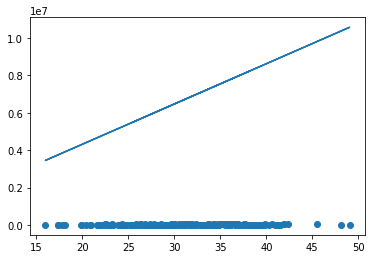

In [320]:
def man_fit(X_train, y_train):
    # Ordinary Least Squares
    beta = (
        np.dot(X_train.transpose()[0], y_train)[0] - ( (1/len(X_train)) * X_train.sum() * y_train.sum() ) /
        ( (X_train**2).sum() - (1/len(X_train)) * X_train.sum()**2 )
    )

    alpha = y_train.mean() - (beta * X_train.mean())

    return alpha, beta


def man_predict(X_test, alpha, beta):
    y_hat = beta * X_test + alpha
    
    return y_hat

alpha, beta = man_fit(X_train_bmi, y_train)
man_preds = man_predict(X_test[['bmi']], alpha[0], beta[0])

print("Alpha =", alpha[0], "\nBeta =", beta[0])

print("\nMean Squared Error:", mean_squared_error(y_test, man_preds))
print("Mean Absolute Error:", mean_absolute_error(y_test, man_preds))
print("Root Mean Squared Error:", mean_squared_error(y_test, man_preds, squared=False))

plt.scatter(X_test[['bmi']], y_test)
plt.plot(X_test[['bmi']], man_preds)

### Entrenamiento con variable independiente BMI y algoritmo de Sklearn

Coeficientes: [[2068.99044792]]

Mean Squared Error: 4147721390.741549
Mean Absolute Error: 62481.14586805592
Root Mean Squared Error: 64402.80576761814


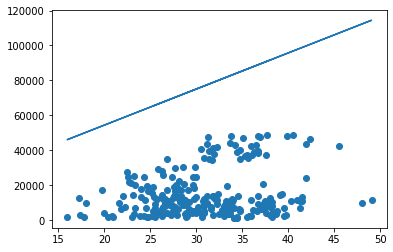

In [321]:
from sklearn.linear_model import LinearRegression

bmi_reg = LinearRegression(normalize=False, n_jobs=-1).fit(X_train_bmi, y_train)
bmi_y_hat = bmi_reg.predict(X_test[['bmi']])

print("Coeficientes:", bmi_reg.coef_)

print("\nMean Squared Error:", mean_squared_error(y_test, bmi_y_hat))
print("Mean Absolute Error:", mean_absolute_error(y_test, bmi_y_hat))
print("Root Mean Squared Error:", mean_squared_error(y_test, bmi_y_hat, squared=False))

plt.scatter(X_test[['bmi']], y_test)
plt.plot(X_test[['bmi']], bmi_y_hat)

In [322]:
X_train_std = sc.fit_transform(X_train, y_train)

reg = LinearRegression(normalize=False, n_jobs=-1).fit(X_train_std, y_train)
y_hat = reg.predict(X_test)

print("Coeficientes:", reg.coef_)

print("\nMean Squared Error:", mean_squared_error(y_test, bmi_y_hat))
print("Mean Absolute Error:", mean_absolute_error(y_test, bmi_y_hat))
print("Root Mean Squared Error:", mean_squared_error(y_test, bmi_y_hat, squared=False))

Coeficientes: [[3111.14883468 -267.68922057 2779.97100322  705.55121915 9707.69548053
   331.41424658  161.41000125 -420.77788758  -30.4975863 ]]

Mean Squared Error: 4147721390.741549
Mean Absolute Error: 62481.14586805592
Root Mean Squared Error: 64402.80576761814


## Regresión polinomial

Coeficientes: [[10825.79723726  2122.4157076   2130.42611015]]

Mean Squared Error: 5338043568334.526
Mean Absolute Error: 2171636.469282207
Root Mean Squared Error: 2310420.64748706


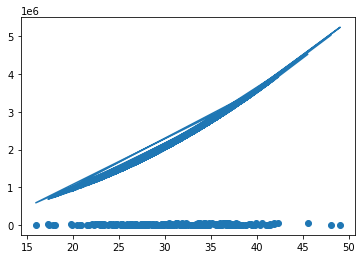

In [333]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1))
])

model = model.fit(X_train_bmi, y_train)
print("Coeficientes:", model.named_steps['linear'].coef_)

bmi_poly_preds = model.predict(X_test[['bmi']])

print("\nMean Squared Error:", mean_squared_error(y_test, bmi_poly_preds))
print("Mean Absolute Error:", mean_absolute_error(y_test, bmi_poly_preds))
print("Root Mean Squared Error:", mean_squared_error(y_test, bmi_poly_preds, squared=False))

plt.scatter(X_test[['bmi']], y_test)
plt.plot(X_test[['bmi']], bmi_poly_preds)


In [334]:
model = model.fit(X_train_std, y_train)
print("Coeficientes:", model.named_steps['linear'].coef_)

poly_preds = model.predict(X_test)

print("\nMean Squared Error:", mean_squared_error(y_test, poly_preds))
print("Mean Absolute Error:", mean_absolute_error(y_test, poly_preds))
print("Root Mean Squared Error:", mean_squared_error(y_test, poly_preds, squared=False))

Coeficientes: [[ 7.02801264e+12  3.80303564e+03 -2.38473637e+14  1.09914563e+03
   1.95606445e+03  7.38318897e+15 -8.79084055e+14 -2.18615485e+14
  -1.09136094e+16 -4.96981384e+15  1.34701715e+03  1.05920024e+03
  -5.64934692e+02  1.00485902e+03 -6.48548733e+02  6.76310900e+14
   6.66827422e+14  7.42422825e+14  6.35347800e+14  7.65812332e+14
   2.41842612e+02 -6.05817687e+02  1.68395284e+02  4.19118483e+15
   4.13241451e+15  4.60088886e+15  3.93733128e+15  8.63667155e+02
  -5.71722081e+02  3.21638567e+03 -1.24617969e+15 -1.22870530e+15
  -1.36799842e+15 -1.17070052e+15 -1.50625000e+02 -2.31500000e+02
   2.18418290e+15  2.15355550e+15  2.39769497e+15  2.05189034e+15
  -5.49442713e+15 -1.19516831e+15 -1.17840923e+15 -1.31200049e+15
  -1.12277882e+15 -2.54330186e+15  5.06525859e+14 -3.85102721e+15
  -7.88140015e+12 -1.78060332e+14 -2.42355801e+15  4.96035875e+15
   3.14182859e+15 -6.73943012e+15  1.02405389e+15]]

Mean Squared Error: 2.670458642947171e+32
Mean Absolute Error: 1.2879212883